进行绘图所需的模块引入

In [1]:
%matplotlib ipympl

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
import plotly.io as pio

下面从项目中的Data文件夹读取相应的数据

In [4]:
location_path='D:/codinglab/bayesian_opt_exper/cubic/active/data/sensor_location.txt'
waveform_path=r'D:/codinglab/bayesian_opt_exper/cubic/active/data/cube_waveform'

# waveform=scipy.io.loadmat(waveform_path)
# print(waveform.keys())
# dict_keys(['__header__', '__version__', '__globals__', 'active','dt','wfm_active'])

# waveform=scipy.io.loadmat(waveform_path)['dt']
# print(waveform)
# 200

waveform=scipy.io.loadmat(waveform_path)['wfm_active']
waveform=waveform.swapaxes(0,2)
[source,receiver,frame]=waveform.shape
print('waveform.shape')
print(waveform.shape)
# we confirm that the shape of waveform is 24*24*2048,the first dimension means the source,the second dimension means the receiver,the third dimension means the frame


# then we will load the location of the sensor
Location_pre=pd.read_table(location_path, sep=' ').values
Location=[]
for i in range(24):
    Location.append([Location_pre[i][1],Location_pre[i][2],Location_pre[i][3]])
    
Location=np.array(Location)
print('Location')
print(Location)

waveform.shape
(24, 24, 2048)
Location
[[49.784   2.667  61.2648]
 [49.9872  2.413  31.5722]
 [24.6634  2.6924 60.8838]
 [24.9682  2.5146 30.9626]
 [ 2.4638 24.8666 60.4774]
 [ 2.4892 25.4762 30.1752]
 [ 2.7178 49.8856 60.6806]
 [ 2.5146 50.5714 30.2768]
 [24.8666 73.66   60.6806]
 [25.273  73.8124 30.1752]
 [50.673  73.6346 60.579 ]
 [50.5714 73.8378 30.1752]
 [73.6346 50.673  60.579 ]
 [73.66   50.673  30.2768]
 [73.66   25.4762 61.087 ]
 [73.6092 25.0698 30.2768]
 [25.5778 50.673   2.3876]
 [25.5778 25.1714  2.4892]
 [50.673  50.0634  2.6416]
 [50.7746 24.9682  2.3114]
 [25.4762 25.6286 88.9   ]
 [50.9778 50.673  88.6968]
 [50.8762 25.3746 89.1032]
 [25.5778 50.9778 89.0016]]


下面我们将进行一些简单的作图，首先是将active的waveform数据进行画出

In [5]:
# 这里我们创建source个folder，用于存储每个source传播时reciever的数据图像
path=r'D:/codinglab/bayesian_opt_exper/cubic/active/draw/log_fourier_pic'
for i in range(source):
    os.mkdir(path+'\\'+str(i+1))

In [7]:
fourier_reserve_path='D:/codinglab/bayesian_opt_exper/cubic/active/draw/log_fourier_pic'
from scipy.fftpack import fft,fftfreq
from scipy import signal
from matplotlib.colors import LogNorm
f=fftfreq(2048,d=200e-6)
f=f[1:]
for i in range(source):
    for j in range(receiver):
        plt.figure(figsize=(20,8))
        spec=fft(waveform[i][j])[1:]
        plt.plot(f[:len(f)//2],np.log(np.abs(spec[:len(f)//2])))
        # plt.savefig(waveform_reserve_path+'\\'+str(i+1)+'\\'+str(i+1)+'-'+str(j+1)+'.png')
        plt.title('source'+str(i+1)+'-'+'receiver'+str(j+1),fontdict={'size':40,'color':'black'})
        plt.savefig(fourier_reserve_path+'\\'+str(i+1)+'\\'+str(i+1)+'-'+str(j+1)+'.png')
        plt.savefig(fourier_reserve_path+'\\'+str(i+1)+'\\'+str(i+1)+'-'+str(j+1)+'.svg',format='svg')
        plt.close()
    
plt.close()

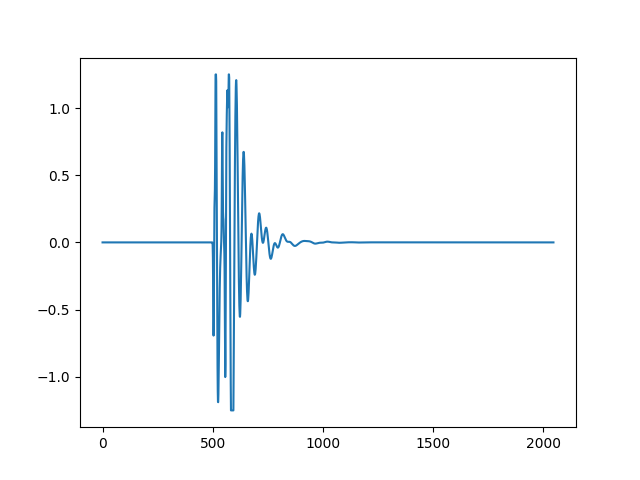

In [67]:
waveform_reserve_path='D:/codinglab/bayesian_opt_exper/cubic/active/draw/waveform_pic'
for i in range(1):
    for j in range(receiver):
        plt.figure(figsize=(20,8))
        plt.plot(range(frame),waveform[i][j])
        # plt.savefig(waveform_reserve_path+'\\'+str(i+1)+'\\'+str(i+1)+'-'+str(j+1)+'.png')
        plt.title('source'+str(i+1)+'-'+'receiver'+str(j+1),fontdict={'size':40,'color':'black'})
        plt.savefig(waveform_reserve_path+'\\'+str(i+1)+'\\'+str(i+1)+'-'+str(j+1)+'.png')
        plt.savefig(waveform_reserve_path+'\\'+str(i+1)+'\\'+str(i+1)+'-'+str(j+1)+'.svg',format='svg')
        plt.close()
    
plt.close()
# under used to show
plt.figure()
plt.plot(range(frame),waveform[0][0])



plt.show()

下面将作图以展现sensor的位置，从而实现我们数据的获取来源

In [4]:
# first we record the parameter of the cube
# length=71.0
# width=71.0
length=76.2
width=76.2
height=91.4

In [5]:
group=[[1,2,3,0],[5,6,7,4],[9,10,11,8],[13,14,15,12],[17,18,19,16],[21,22,23,20]]
color=['red','blue','green','yellow','purple','pink']
lightcolor=['lightcoral','orange','lightgreen','lightyellow','lightpurple','lightpink']

In [15]:
fig=go.Figure()
for i in range(6):
    fig.add_trace(go.Scatter3d(x=Location[group[i],0],y=Location[group[i],1],z=Location[group[i],2],mode='markers',marker=dict(size=3,symbol='circle',color=color[i],opacity=0.7)))
    
fig.update_layout(scene=dict(xaxis=dict(showticklabels=False,showgrid=False,zeroline=False,showline=False),
                             yaxis=dict(showticklabels=False,showgrid=False,zeroline=False,showline=False),
                             zaxis=dict(showticklabels=False,showgrid=False,zeroline=False,showline=False)))

# 将立方体12条棱线画出来
fig.add_trace(go.Scatter3d(x=[0,0,length,length,0],
                           y=[0,width,width,0,0],
                            z=[0,0,0,0,0],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[0,0,length,length,0],
                           y=[0,width,width,0,0],
                            z=[height,height,height,height,height],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[0,0],
                           y=[0,0],
                            z=[0,height],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[length,length],
                           y=[0,0],
                            z=[0,height],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[0,0],
                            y=[width,width],
                             z=[0,height],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[length,length],
                            y=[width,width],
                             z=[0,height],
                           mode='lines',
                           line=dict(color='black', width=4)))

place_to_paint=np.array(Location).swapaxes(0,1)
annotations = []
for i in range(24):
    annotations.append(dict(x=place_to_paint[0][i], y=place_to_paint[1][i], z=place_to_paint[2][i],
                            text='{}'.format(i+1),
                            showarrow=False,
                            font=dict(color='black',size=14)))

# def get_trace(start_point,end_point,i):
#   num_points=100
#   t=np.linspace(0,1,100)
#   x = start_point[0] + (end_point[0] - start_point[0]) * t
#   y = start_point[1] + (end_point[1] - start_point[1]) * t
#   z = start_point[2] + np.sin(t * (2 * np.pi / num_points)) * 0.5
#   return go.Scatter3d(x=x, y=y, z=z, mode='lines',line=dict(width=2,color=lightcolor[i]))

# for i in range(6):
#   if i==0:
#     fig.add_trace(go.Scatter3d(x=[Location[0][0],Location[1][0]],y=[Location[0][1],Location[1][1]],z=[Location[0][2],Location[1][2]],mode='lines',line=dict(width=2,color='lightcoral')))
#     fig.add_trace(go.Scatter3d(x=[Location[1][0],Location[2][0]],y=[Location[1][1],Location[2][1]],z=[Location[1][2],Location[2][2]],mode='lines',line=dict(width=2,color='lightcoral')))
#     fig.add_trace(go.Scatter3d(x=[Location[2][0],Location[3][0]],y=[Location[2][1],Location[3][1]],z=[Location[2][2],Location[3][2]],mode='lines',line=dict(width=2,color='lightcoral')))
#   else:
#     for j in range(4):
#       fig.add_trace(get_trace(Location[0],Location[group[i][j]],i))

# fig.add_trace(go.Scatter3d(x=[Location[0][0],Location[1][0]],y=[Location[0][1],Location[1][1]],z=[Location[0][2],Location[1][2]],mode='lines',line=dict(width=2,color='lightcoral'),opacity=0.3))
# dir=Location[1]-Location[0]
# fig.add_trace(go.Cone(
#     x=[Location[1][0]],
#     y=[Location[1][1]],
#     z=[Location[1][2]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=1,
#     showscale=False
# ))
# fig.add_trace(go.Scatter3d(x=[Location[0][0],Location[2][0]],y=[Location[0][1],Location[2][1]],z=[Location[0][2],Location[2][2]],mode='lines',line=dict(width=2,color='lightcoral'),opacity=0.3))
# dir=Location[2]-Location[0]
# fig.add_trace(go.Cone(
#     x=[Location[2][0]],
#     y=[Location[2][1]],
#     z=[Location[2][2]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=1,
#     showscale=False
# ))
# fig.add_trace(go.Scatter3d(x=[Location[0][0],Location[3][0]],y=[Location[0][1],Location[3][1]],z=[Location[0][2],Location[3][2]],mode='lines',line=dict(width=2,color='lightcoral'),opacity=0.2))
# dir=Location[3]-Location[0]
# fig.add_trace(go.Cone(
#     x=[Location[3][0]],
#     y=[Location[3][1]],
#     z=[Location[3][2]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=1,
#     showscale=False
# ))

# xx=np.linspace(0,1,100)
# #计算一个周期为200的正弦
# yy=np.sin(np.pi*xx)*3
# zz=yy*1.5

# dis4=np.abs(Location[4]-Location[0])
# x4=np.linspace(Location[0][0],Location[4][0],100)
# y4=np.linspace(Location[0][1],Location[4][1],100)
# z4=np.linspace(Location[0][2],Location[4][2],100)
# y4=y4-yy*2
# z4=z4-zz
# fig.add_trace(go.Scatter3d(x=x4,y=y4,z=z4,mode='lines',line=dict(width=2,color='orange'),opacity=0.2))
# dir=[x4[-1]-x4[-2],y4[-1]-y4[-2],z4[-1]-z4[-2]]
# fig.add_trace(go.Cone(
#     x=[x4[-4]],
#     y=[y4[-4]],
#     z=[z4[-4]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis5=np.abs(Location[5]-Location[0])
# x5=np.linspace(Location[0][0],Location[5][0],100)
# y5=np.linspace(Location[0][1],Location[5][1],100)
# z5=np.linspace(Location[0][2],Location[5][2],100)
# y5=y5-yy*3
# z5=z5-zz
# fig.add_trace(go.Scatter3d(x=x5,y=y5,z=z5,mode='lines',line=dict(width=2,color='orange'),opacity=0.2))
# dir=[x5[-1]-x5[-2],y5[-1]-y5[-2],z5[-1]-z5[-2]]
# fig.add_trace(go.Cone(
#     x=[x5[-4]],
#     y=[y5[-4]],
#     z=[z5[-4]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis6=np.abs(Location[6]-Location[0])
# x6=np.linspace(Location[0][0],Location[6][0],100)
# y6=np.linspace(Location[0][1],Location[6][1],100)
# z6=np.linspace(Location[0][2],Location[6][2],100)
# y6=y6-yy*4
# z6=z6-zz
# fig.add_trace(go.Scatter3d(x=x6,y=y6,z=z6,mode='lines',line=dict(width=2,color='orange'),opacity=0.2))
# dir=[x6[-1]-x6[-2],y6[-1]-y6[-2],z6[-1]-z6[-2]]
# fig.add_trace(go.Cone(
#     x=[x6[-4]],
#     y=[y6[-4]],
#     z=[z6[-4]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis7=np.abs(Location[7]-Location[0])
# x7=np.linspace(Location[0][0],Location[7][0],100)
# y7=np.linspace(Location[0][1],Location[7][1],100)
# z7=np.linspace(Location[0][2],Location[7][2],100)
# y7=y7-yy*2
# z7=z7-zz
# fig.add_trace(go.Scatter3d(x=x7,y=y7,z=z7,mode='lines',line=dict(width=2,color='orange'),opacity=0.2))
# dir=[x7[-1]-x7[-2],y7[-1]-y7[-2],z7[-1]-z7[-2]]
# fig.add_trace(go.Cone(
#     x=[x7[-4]],
#     y=[y7[-4]],
#     z=[z7[-4]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis8=np.abs(Location[8]-Location[0])
# x8=np.linspace(Location[0][0],Location[8][0],100)
# y8=np.linspace(Location[0][1],Location[8][1],100)
# z8=np.linspace(Location[0][2],Location[8][2],100)
# x8=x8-yy*2
# y8=y8-yy*3
# z8=z8-zz
# fig.add_trace(go.Scatter3d(x=x8,y=y8,z=z8,mode='lines',line=dict(width=2,color='orange'),opacity=0.2))
# dir=[x8[-1]-x8[-2],y8[-1]-y8[-2],z8[-1]-z8[-2]]
# fig.add_trace(go.Cone(
#     x=[x8[-4]],
#     y=[y8[-4]],
#     z=[z8[-4]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis9=np.abs(Location[9]-Location[0])
# x9=np.linspace(Location[0][0],Location[9][0],100)
# y9=np.linspace(Location[0][1],Location[9][1],100)
# z9=np.linspace(Location[0][2],Location[9][2],100)
# x9=x9-yy*2
# y9=y9-yy*4
# z9=z9-zz*2
# fig.add_trace(go.Scatter3d(x=x9,y=y9,z=z9,mode='lines',line=dict(width=2,color='orange'),opacity=0.4))
# dir=[x9[-1]-x9[-2],y9[-1]-y9[-2],z9[-1]-z9[-2]]
# fig.add_trace(go.Cone(
#     x=[x9[-4]],
#     y=[y9[-4]],
#     z=[z9[-4]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis10=np.abs(Location[10]-Location[0])
# x10=np.linspace(Location[0][0],Location[10][0],100)
# y10=np.linspace(Location[0][1],Location[10][1],100)
# z10=np.linspace(Location[0][2],Location[10][2],100)
# x10=x10+yy
# y10=y10-yy*2
# z10=z10-zz
# fig.add_trace(go.Scatter3d(x=x10,y=y10,z=z10,mode='lines',line=dict(width=2,color='orange'),opacity=0.4))
# dir=[x10[-1]-x10[-2],y10[-1]-y10[-2],z10[-1]-z10[-2]]
# fig.add_trace(go.Cone(
#     x=[x10[-4]],
#     y=[y10[-4]],
#     z=[z10[-4]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis11=np.abs(Location[11]-Location[0])
# x11=np.linspace(Location[0][0],Location[11][0],100)
# y11=np.linspace(Location[0][1],Location[11][1],100)
# z11=np.linspace(Location[0][2],Location[11][2],100)
# x11=x11+yy*2
# y11=y11-yy*3
# z11=z11-zz
# fig.add_trace(go.Scatter3d(x=x11,y=y11,z=z11,mode='lines',line=dict(width=2,color='orange'),opacity=0.4))
# dir=[x11[-1]-x11[-2],y11[-1]-y11[-2],z11[-1]-z11[-2]]
# fig.add_trace(go.Cone(
#     x=[x11[-4]],
#     y=[y11[-4]],
#     z=[z11[-4]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis12=np.abs(Location[12]-Location[0])
# x12=np.linspace(Location[0][0],Location[12][0],100)
# y12=np.linspace(Location[0][1],Location[12][1],100)
# z12=np.linspace(Location[0][2],Location[12][2],100)
# x12=x12+yy*2
# y12=y12+yy
# z12=z12-zz
# fig.add_trace(go.Scatter3d(x=x12,y=y12,z=z12,mode='lines',line=dict(width=2,color='orange'),opacity=0.25))
# dir=[x12[-1]-x12[-2],y12[-1]-y12[-2],z12[-1]-z12[-2]]
# fig.add_trace(go.Cone(
#     x=[x12[-6]],
#     y=[y12[-6]],
#     z=[z12[-6]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis13=np.abs(Location[13]-Location[0])
# x13=np.linspace(Location[0][0],Location[13][0],100)
# y13=np.linspace(Location[0][1],Location[13][1],100)
# z13=np.linspace(Location[0][2],Location[13][2],100)
# x13=x13+yy*2
# y13=y13+yy
# z13=z13-zz
# fig.add_trace(go.Scatter3d(x=x13,y=y13,z=z13,mode='lines',line=dict(width=2,color='orange'),opacity=0.25))
# dir=[x13[-1]-x13[-2],y13[-1]-y13[-2],z13[-1]-z13[-2]]
# fig.add_trace(go.Cone(
#     x=[x13[-6]],
#     y=[y13[-6]],
#     z=[z13[-6]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis14=np.abs(Location[14]-Location[0])
# x14=np.linspace(Location[0][0],Location[14][0],100)
# y14=np.linspace(Location[0][1],Location[14][1],100)
# z14=np.linspace(Location[0][2],Location[14][2],100)
# x14=x14+yy*4
# y14=y14+yy*2
# z14=z14-zz
# fig.add_trace(go.Scatter3d(x=x14,y=y14,z=z14,mode='lines',line=dict(width=2,color='orange'),opacity=0.25))
# dir=[x14[-1]-x14[-2],y14[-1]-y14[-2],z14[-1]-z14[-2]]
# fig.add_trace(go.Cone(
#     x=[x14[-6]],
#     y=[y14[-6]],
#     z=[z14[-6]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis15=np.abs(Location[15]-Location[0])
# x15=np.linspace(Location[0][0],Location[15][0],100)
# y15=np.linspace(Location[0][1],Location[15][1],100)
# z15=np.linspace(Location[0][2],Location[15][2],100)
# x15=x15+yy*4
# y15=y15+yy*3
# z15=z15-zz
# fig.add_trace(go.Scatter3d(x=x15,y=y15,z=z15,mode='lines',line=dict(width=2,color='orange'),opacity=0.25))
# dir=[x15[-1]-x15[-2],y15[-1]-y15[-2],z15[-1]-z15[-2]]
# fig.add_trace(go.Cone(
#     x=[x15[-6]],
#     y=[y15[-6]],
#     z=[z15[-6]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis16=np.abs(Location[16]-Location[0])
# x16=np.linspace(Location[0][0],Location[16][0],100)
# y16=np.linspace(Location[0][1],Location[16][1],100)
# z16=np.linspace(Location[0][2],Location[16][2],100)
# z16=z16-zz*3
# fig.add_trace(go.Scatter3d(x=x16,y=y16,z=z16,mode='lines',line=dict(width=2,color='orange'),opacity=0.4))
# dir=[x16[-1]-x16[-2],y16[-1]-y16[-2],z16[-1]-z16[-2]]
# fig.add_trace(go.Cone(
#     x=[x16[-4]],
#     y=[y16[-4]],
#     z=[z16[-4]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis17=np.abs(Location[17]-Location[0])
# x17=np.linspace(Location[0][0],Location[17][0],100)
# y17=np.linspace(Location[0][1],Location[17][1],100)
# z17=np.linspace(Location[0][2],Location[17][2],100)
# z17=z17-zz*2
# fig.add_trace(go.Scatter3d(x=x17,y=y17,z=z17,mode='lines',line=dict(width=2,color='orange'),opacity=0.4))
# dir=[x17[-1]-x17[-2],y17[-1]-y17[-2],z17[-1]-z17[-2]]
# fig.add_trace(go.Cone(
#     x=[x17[-4]],
#     y=[y17[-4]],
#     z=[z17[-4]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis18=np.abs(Location[18]-Location[0])
# x18=np.linspace(Location[0][0],Location[18][0],100)
# y18=np.linspace(Location[0][1],Location[18][1],100)
# z18=np.linspace(Location[0][2],Location[18][2],100)
# z18=z18-zz*3
# fig.add_trace(go.Scatter3d(x=x18,y=y18,z=z18,mode='lines',line=dict(width=2,color='orange'),opacity=0.4))
# dir=[x18[-1]-x18[-2],y18[-1]-y18[-2],z18[-1]-z18[-2]]
# fig.add_trace(go.Cone(
#     x=[x18[-4]],
#     y=[y18[-4]],
#     z=[z18[-4]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis19=np.abs(Location[19]-Location[0])
# x19=np.linspace(Location[0][0],Location[19][0],100)
# y19=np.linspace(Location[0][1],Location[19][1],100)
# z19=np.linspace(Location[0][2],Location[19][2],100)
# z19=z19-zz*2
# fig.add_trace(go.Scatter3d(x=x19,y=y19,z=z19,mode='lines',line=dict(width=2,color='orange'),opacity=0.4))
# dir=[x19[-1]-x19[-2],y19[-1]-y19[-2],z19[-1]-z19[-2]]
# fig.add_trace(go.Cone(
#     x=[x19[-4]],
#     y=[y19[-4]],
#     z=[z19[-4]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis20=np.abs(Location[20]-Location[0])
# x20=np.linspace(Location[0][0],Location[20][0],100)
# y20=np.linspace(Location[0][1],Location[20][1],100)
# z20=np.linspace(Location[0][2],Location[20][2],100)
# z20=z20+zz
# y20=y20-yy*2
# fig.add_trace(go.Scatter3d(x=x20,y=y20,z=z20,mode='lines',line=dict(width=2,color='orange'),opacity=0.4))
# dir=[x20[-1]-x20[-2],y20[-1]-y20[-2],z20[-1]-z20[-2]]
# fig.add_trace(go.Cone(
#     x=[x20[-6]],
#     y=[y20[-6]],
#     z=[z20[-6]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis21=np.abs(Location[21]-Location[0])
# x21=np.linspace(Location[0][0],Location[21][0],100)
# y21=np.linspace(Location[0][1],Location[21][1],100)
# z21=np.linspace(Location[0][2],Location[21][2],100)
# z21=z21+zz
# fig.add_trace(go.Scatter3d(x=x21,y=y21,z=z21,mode='lines',line=dict(width=2,color='orange'),opacity=0.4))
# dir=[x21[-1]-x21[-2],y21[-1]-y21[-2],z21[-1]-z21[-2]]
# fig.add_trace(go.Cone(
#     x=[x21[-6]],
#     y=[y21[-6]],
#     z=[z21[-6]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis22=np.abs(Location[22]-Location[0])
# x22=np.linspace(Location[0][0],Location[22][0],100)
# y22=np.linspace(Location[0][1],Location[22][1],100)
# z22=np.linspace(Location[0][2],Location[22][2],100)
# z22=z22+zz
# fig.add_trace(go.Scatter3d(x=x22,y=y22,z=z22,mode='lines',line=dict(width=2,color='orange'),opacity=0.4))
# dir=[x22[-1]-x22[-2],y22[-1]-y22[-2],z22[-1]-z22[-2]]
# fig.add_trace(go.Cone(
#     x=[x22[-20]],
#     y=[y22[-20]],
#     z=[z22[-20]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))

# dis23=np.abs(Location[23]-Location[0])
# x23=np.linspace(Location[0][0],Location[23][0],100)
# y23=np.linspace(Location[0][1],Location[23][1],100)
# z23=np.linspace(Location[0][2],Location[23][2],100)
# z23=z23+zz
# fig.add_trace(go.Scatter3d(x=x23,y=y23,z=z23,mode='lines',line=dict(width=2,color='orange'),opacity=0.4))
# dir=[x23[-1]-x23[-2],y23[-1]-y23[-2],z23[-1]-z23[-2]]
# fig.add_trace(go.Cone(
#     x=[x23[-6]],
#     y=[y23[-6]],
#     z=[z23[-6]],
#     u=[dir[0]],
#     v=[dir[1]],
#     w=[dir[2]],
#     sizemode="absolute",
#     sizeref=4,
#     showscale=False
# ))





# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),scene_annotations=annotations)





fig.show()

In [62]:
# then we use plotly to draw the cube and the sensor,and we use the red color to show the sensor and then 
fig = go.Figure(data=[
    go.Scatter3d(
        x=Location[:,0],
        y=Location[:,1],
        z=Location[:,2],
        mode='markers',
        marker=dict(
            symbol='circle',
            size=4,
            color='red',                # set color to an array/list of desired values
            opacity=0.4
        )
    )
])

# 删去坐标轴的mesh
fig.update_layout(scene=dict(xaxis=dict(showticklabels=False,showgrid=False,zeroline=False,showline=False),
                             yaxis=dict(showticklabels=False,showgrid=False,zeroline=False,showline=False),
                             zaxis=dict(showticklabels=False,showgrid=False,zeroline=False,showline=False)))

# 将立方体12条棱线画出来
fig.add_trace(go.Scatter3d(x=[0,0,length,length,0],
                           y=[0,width,width,0,0],
                            z=[0,0,0,0,0],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[0,0,length,length,0],
                           y=[0,width,width,0,0],
                            z=[height,height,height,height,height],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[0,0],
                           y=[0,0],
                            z=[0,height],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[length,length],
                           y=[0,0],
                            z=[0,height],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[0,0],
                            y=[width,width],
                             z=[0,height],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[length,length],
                            y=[width,width],
                             z=[0,height],
                           mode='lines',
                           line=dict(color='black', width=4)))



place_to_paint=np.array(Location).swapaxes(0,1)
annotations = []
for i in range(24):
    annotations.append(dict(x=place_to_paint[0][i], y=place_to_paint[1][i], z=place_to_paint[2][i],
                            text='{}'.format(i+1),
                            showarrow=False,
                            font=dict(color='black',size=14)))
    
# 加入平面z=31,z=61,x=25,x=50,y=25,y=50
color=np.array([[1,1],[1,1],[1,1]])
fig.add_trace(go.Surface(z=[[31,31],[31,31]],x=[[0,0],[length,length]],y=[[0,width],[0,width]],opacity=0.3,surfacecolor=color))
# fig.add_trace(go.Surface(z=[[61,61],[61,61]],x=[[0,0],[length,length]],y=[[0,width],[0,width]],opacity=0.2,colorscale='Blues'))
# fig.add_trace(go.Surface(x=[[25,25],[25,25]],y=[[0,0],[width,width]],z=[[0,height],[0,height]],opacity=0.2,colorscale='Blues'))
# fig.add_trace(go.Surface(x=[[50,50],[50,50]],y=[[0,0],[width,width]],z=[[0,height],[0,height]],opacity=0.2,colorscale='Blues'))
# fig.add_trace(go.Surface(y=[[25,25],[25,25]],z=[[0,0],[height,height]],x=[[0,length],[0,length]],opacity=0.2,colorscale='Blues'))
# fig.add_trace(go.Surface(y=[[50,50],[50,50]],z=[[0,0],[height,height]],x=[[0,length],[0,length]],opacity=0.2,colorscale='Blues'))

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),scene_annotations=annotations)
# fig.write_image("3d_plot.svg")
fig.show()


下面画展开图标明位置

In [19]:
fig = go.Figure()

# 删去坐标轴的mesh
fig.update_layout(scene=dict(xaxis=dict(showticklabels=False,showgrid=False,zeroline=False,showline=False),
                             yaxis=dict(showticklabels=False,showgrid=False,zeroline=False,showline=False),
                             zaxis=dict(showticklabels=False,showgrid=False,zeroline=False,showline=False)))

# 将立方体12条棱线画出来
fig.add_trace(go.Scatter3d(x=[0,0,length,length,0],
                           y=[0,width,width,0,0],
                            z=[0,0,0,0,0],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[0,0,length,length,0],
                           y=[0,width,width,0,0],
                            z=[height,height,height,height,height],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[0,0],
                           y=[0,0],
                            z=[0,height],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[length,length],
                           y=[0,0],
                            z=[0,height],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[0,0],
                            y=[width,width],
                             z=[0,height],
                           mode='lines',
                           line=dict(color='black', width=4)))
fig.add_trace(go.Scatter3d(x=[length,length],
                            y=[width,width],
                             z=[0,height],
                           mode='lines',
                           line=dict(color='black', width=4)))

#画一个长方体
h=height*2/3
y=[35,36,36,35,35,36,36,35]
x=[0,0,length,length,0,0,length,length]
z=[0,0,0,0,80,80,80,80]
i = [7, 3, 0, 4, 7, 3, 1, 2, 6, 5, 4, 1]
j = [3, 0, 1, 5, 6, 2, 2, 3, 5, 6, 0, 0]
k = [0, 7, 4, 7, 2, 6, 3, 7, 1, 1, 5, 4]
fig.add_trace(go.Mesh3d(x=x, y=y, z=z, i=i, j=j, k=k, color='lightblue', opacity=0.5))

x2=[3*length/4,3*length/4,length,length,3*length/4,3*length/4,length,length]
y2=[35,36,36,35,60,61,61,60]
z2=[h/2,h/2,h/2,h/2,height,height,height,height]
fig.add_trace(go.Mesh3d(x=x2, y=y2, z=z2, i=i, j=j, k=k, color='lightblue', opacity=0.5))

x3=[3*length/5,3*length/5,0,0,3*length/5,3*length/5,0,0]
y2=[0,0,0,0,width,width,width,width]
z3=[h/2,h/2,h/2,h/2,h/2,h/2,h/2,h/2]
fig.add_trace(go.Mesh3d(x=x3, y=y2, z=z3, i=i, j=j, k=k, color='lightpink', opacity=0.2))


# 不显示图中的xyz
fig.update_layout(scene=dict(xaxis=dict(showticklabels=False,showgrid=False,zeroline=False,showline=False),
                             yaxis=dict(showticklabels=False,showgrid=False,zeroline=False,showline=False),
                             zaxis=dict(showticklabels=False,showgrid=False,zeroline=False,showline=False)))




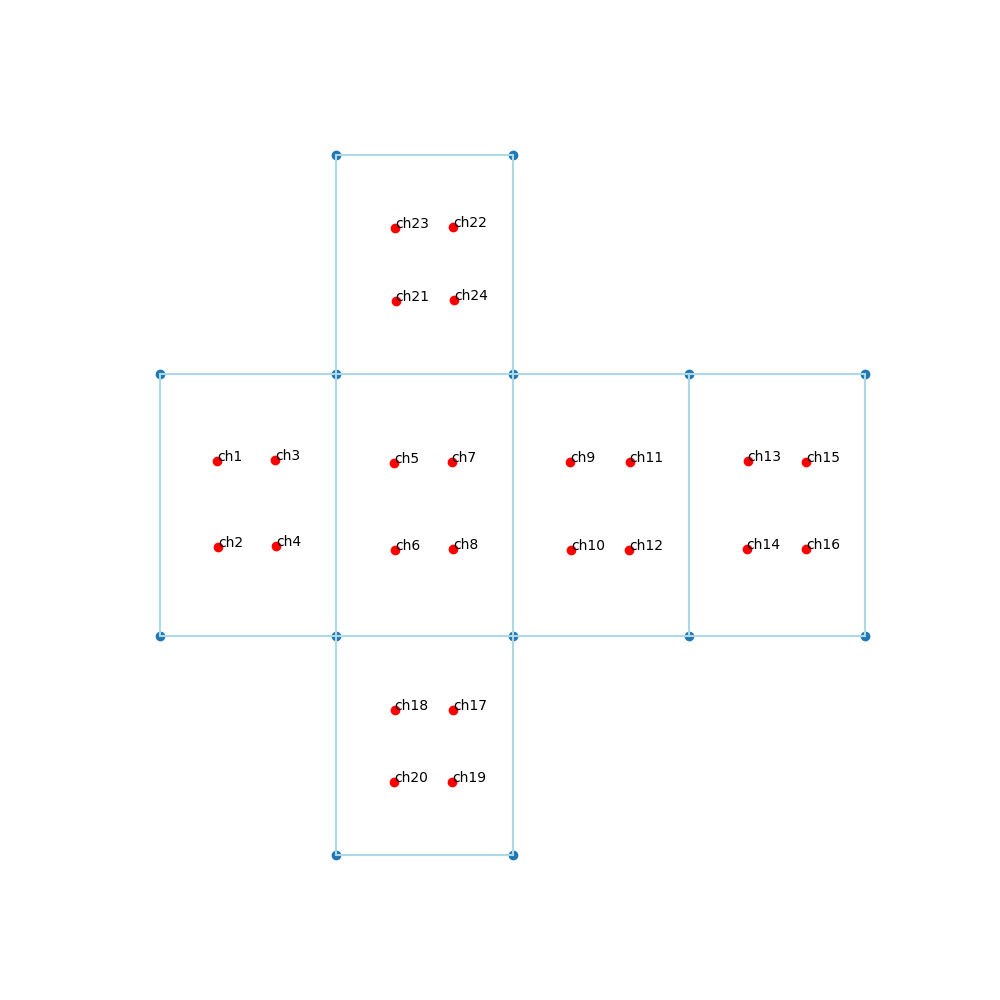

In [12]:
# 下面我们要将这个方块展开，然后画出展开的图片和传感器的位置
# 首先，我们画出立方体展开成平面图的样子

# cross_point_x=[0,0,71.0,71.0,142.0,142.0,213.0,213.0,284.0,284.0,71.0,142.0,71.0,142.0]
# cross_point_y=[0,91.4,0,91.4,0,91.4,0,91.4,0,91.4,162.4,162.4,-71.0,-71.0]
cross_point_x=[0,0,length,length,length+width,length+width,length+width+length,length+width+length,length+width+length+width,length+width+length+width,length,length+width,length,length+width]
cross_point_y=[0,height,0,height,0,height,0,height,0,height,height+length,height+length,-length,-length]
link_order=[[0,1],[0,2],[1,3],[2,3],[2,4],[3,5],[4,5],[4,6],[5,7],[6,7],[6,8],[7,9],[8,9],[10,3],[10,11],[11,5],[12,2],[12,13],[13,4]]
# 下面画出这些点
plt.figure(figsize=(10,10))
plt.scatter(cross_point_x,cross_point_y)
# 下面我们连接这些点
for link in link_order:
    plt.plot([cross_point_x[link[0]],cross_point_x[link[1]]],[cross_point_y[link[0]],cross_point_y[link[1]]],color='lightblue')
    
# 下面我们画出传感器的位置
sensor_place_2d=[]
text=[]
expend_place=[]
for i in range(source+1):
    expend_place.append([])

for i in range(source):
    if(Location[i][1]<3):
        sensor_place_2d.append([Location[i][0],Location[i][2]])
        if(i<=1):
            text.append('ch{}'.format(i+3))
            expend_place[i+3]=[Location[i][0],Location[i][2]]
        else:
            text.append('ch{}'.format(i-1))
            expend_place[i-1]=[Location[i][0],Location[i][2]]
    if(Location[i][0]<3):
        sensor_place_2d.append([Location[i][1]+length,Location[i][2]])
        text.append('ch{}'.format(i+1))
        expend_place[i+1]=[Location[i][1]+length,Location[i][2]]
    if(Location[i][1]>73):
        sensor_place_2d.append([Location[i][0]+length+width,Location[i][2]])
        text.append('ch{}'.format(i+1))
        expend_place[i+1]=[Location[i][0]+length+width,Location[i][2]]
    if(Location[i][0]>73):
        sensor_place_2d.append([Location[i][1]+length*2+width,Location[i][2]])
        if(i<=13):
            text.append('ch{}'.format(i+3))
            expend_place[i+3]=[Location[i][1]+length*2+width,Location[i][2]]
        else:
            text.append('ch{}'.format(i-1))
            expend_place[i-1]=[Location[i][1]+length*2+width,Location[i][2]]
    if(Location[i][2]<3):
        sensor_place_2d.append([Location[i][1]+length,-Location[i][0]])
        text.append('ch{}'.format(i+1))
        expend_place[i+1]=[Location[i][1]+length,-Location[i][0]]
    if(Location[i][2]>88):
        sensor_place_2d.append([Location[i][1]+length,Location[i][0]+height])
        text.append('ch{}'.format(i+1))
        expend_place[i+1]=[Location[i][1]+length,Location[i][0]+height]
        
sensor_place_2d=np.array(sensor_place_2d).swapaxes(0,1)
plt.scatter(sensor_place_2d[0],sensor_place_2d[1],color='red')
plt.axis('off')
# 下面我们将传感器的编号写上去
for i in range(len(text)):
    plt.annotate(text[i],(sensor_place_2d[0][i],sensor_place_2d[1][i]))



# 下面我们将这个图保存下来
plt.savefig('D:/codinglab/bayesian_opt_exper/cubic/active/draw/cube_expend.svg',format='svg')
    
    
plt.show()

In [9]:
print(expend_place)

[[], [24.6634, 60.8838], [24.9682, 30.9626], [49.784, 61.2648], [49.9872, 31.5722], [101.0666, 60.4774], [101.6762, 30.1752], [126.0856, 60.6806], [126.7714, 30.2768], [177.26659999999998, 60.6806], [177.673, 30.1752], [203.073, 60.579], [202.97140000000002, 30.1752], [254.07620000000003, 61.087], [253.6698, 30.2768], [279.273, 60.579], [279.273, 30.2768], [126.873, -25.5778], [101.3714, -25.5778], [126.2634, -50.673], [101.1682, -50.7746], [101.8286, 116.87620000000001], [126.873, 142.3778], [101.5746, 142.27620000000002], [127.1778, 116.9778]]


下面将波形按照其展开图的方位显示出来

In [8]:
expend_draw_place=[]
for i in range(8):
    expend_draw_place.append(17+i)
    expend_draw_place.append(25+i)
expend_draw_place.append(36)
expend_draw_place.append(35)
expend_draw_place.append(44)
expend_draw_place.append(43)
expend_draw_place.append(11)
expend_draw_place.append(4)
expend_draw_place.append(3)
expend_draw_place.append(12)

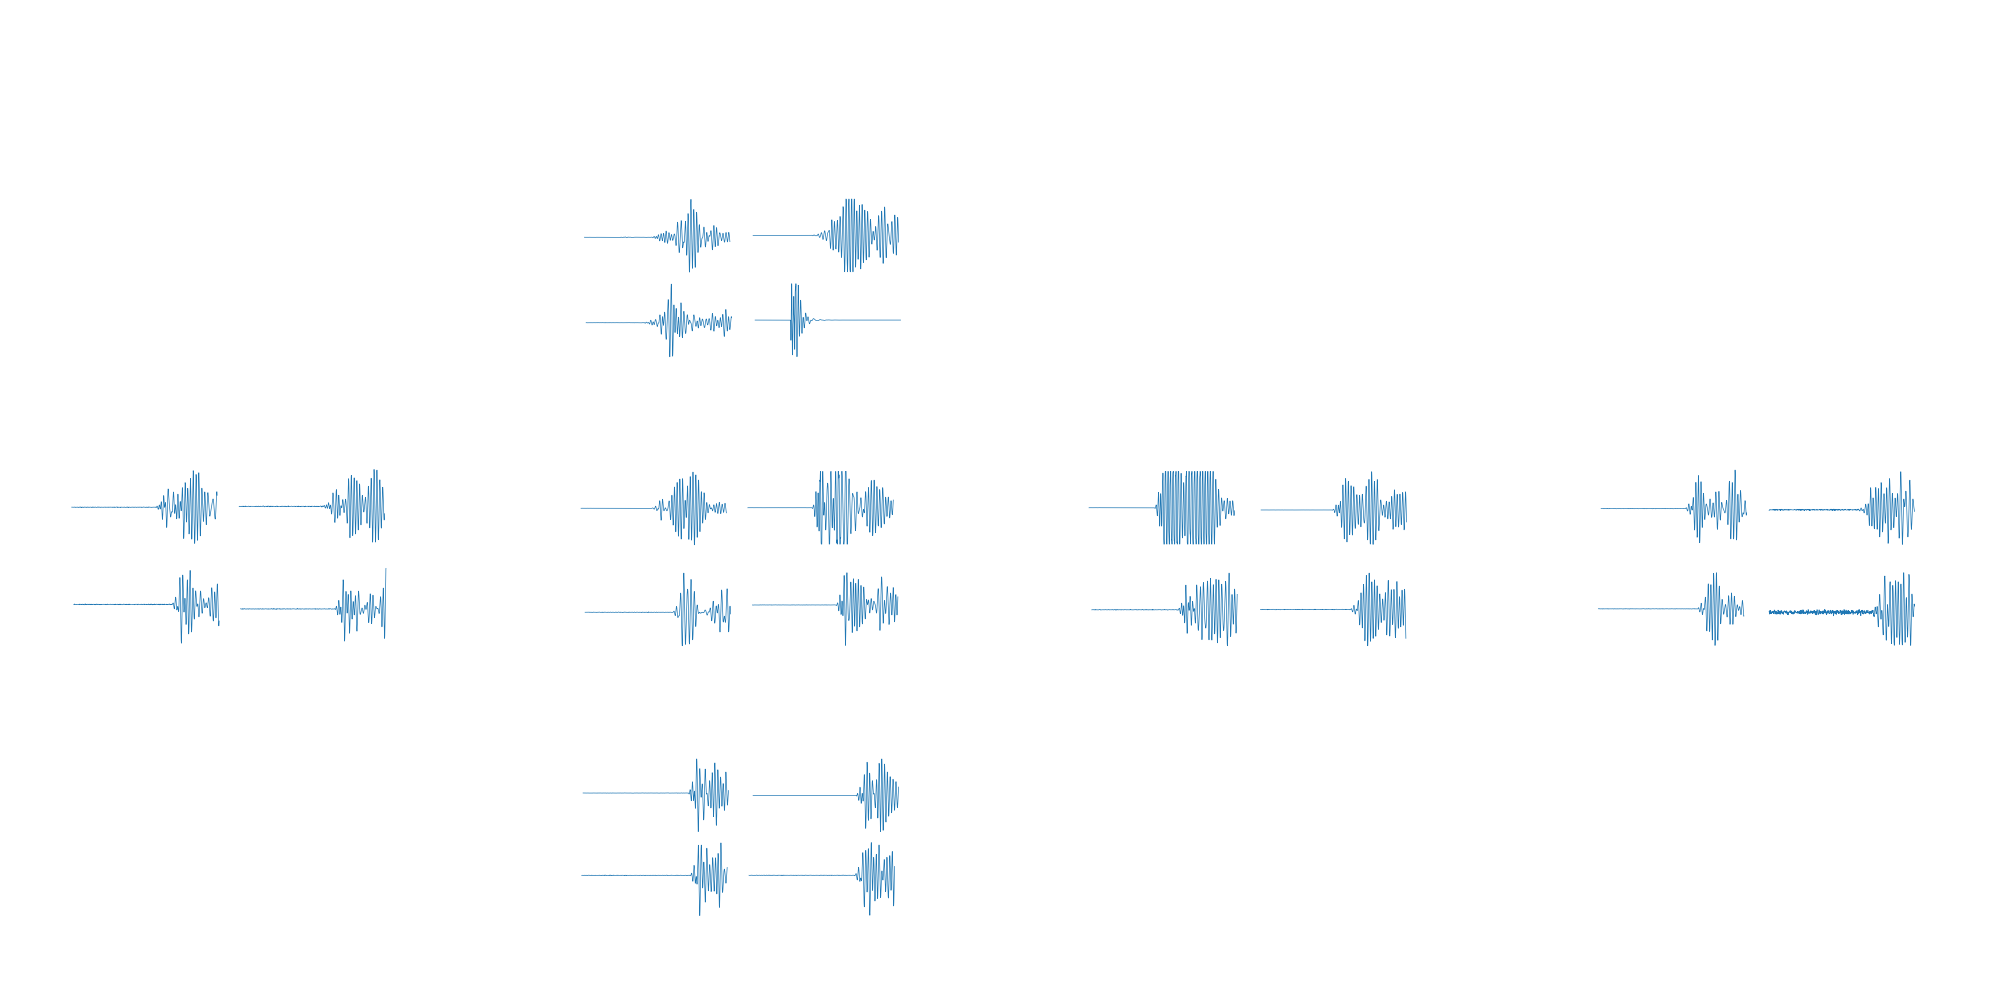

In [9]:
expend_path=r'D:\coding\AcousticSensing\Draw\cube\expend_waveform_pic'
for j in range(source):
    plt.close()
    fig=plt.figure(figsize=(20,10))
    for i in range(24):
        plt.subplot(position=[expend_place[i+1][0]/300-0.05,expend_place[i+1][1]/300+0.25,0.08,0.08])
        x=range(frame)
        y=waveform[j][i]
        plt.plot(x,y,linewidth =0.5)
        plt.axis('off')
    plt.savefig(expend_path+'\\'+str(j+1)+'.png')
plt.show()

下面画出傅里叶变换后的频域图

In [18]:
path=r'D:\coding\AcousticSensing\Draw\cube\fourier_waveform'
for i in range(source):
    os.mkdir(path+'\\'+str(i+1))

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: 'D:\\coding\\AcousticSensing\\Draw\\cube\\fourier_waveform\\1'

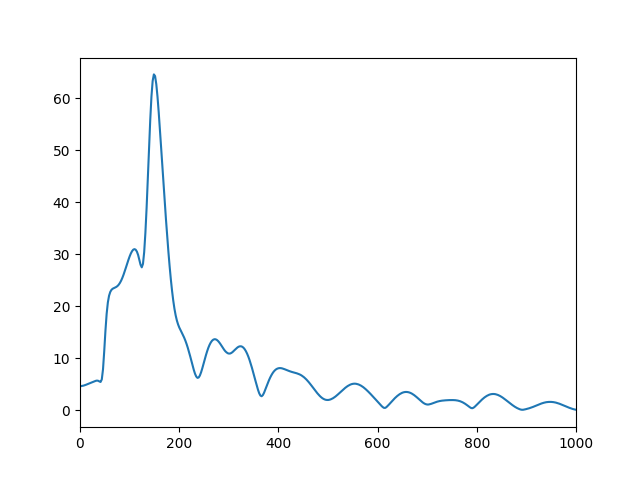

In [64]:
#对波形进行傅里叶变换
# fft_waveform=[]
# for i in range(source):
#     fft_waveform.append([])
#     for j in range(receiver):
#         fft_waveform[i].append(np.fft.fft(waveform[i][j]))
fft_path=r'D:\coding\AcousticSensing\Draw\cube\fourier_waveform'
fft_waveform=[]
fft_waveform.append(np.fft.fft(waveform[0][0]))
frequency=np.fft.fftfreq(frame,200e-6)
frequency = frequency[:len(frequency)//2]
fft_waveform[0] = fft_waveform[0][:len(fft_waveform[0])//2]
plt.figure()
plt.plot(frequency,np.abs(fft_waveform[0]))
plt.xlim(0,1000)
plt.show()
# fft_waveform=[]
# for i in range(source):
#     fft_waveform.append([])
#     for j in range(receiver):
#         fft_waveform[i].append(np.fft.fft(waveform[i][j]))
#         fft_waveform[i][j] = fft_waveform[i][j][:len(fft_waveform[i][j])//2]
#         plt.figure()
#         plt.plot(frequency,np.abs(fft_waveform[i][j]))
#         plt.xlim(0,1000)
#         plt.savefig(fft_path+'\\'+str(i+1)+'\\'+str(i+1)+'-'+str(j+1)+'.png')
#         plt.close()

In [4]:
path=r'D:\coding\AcousticSensing\Draw\cube\ylog_fourier_waveform'
for i in range(source):
    os.mkdir(path+'\\'+str(i+1))

In [5]:
fft_log_path=r'D:\coding\AcousticSensing\Draw\cube\ylog_fourier_waveform'
fft_waveform=[]
frequency=np.fft.fftfreq(frame,200e-6)
frequency = frequency[:len(frequency)//2]
for i in range(source):
    fft_waveform.append([])
    for j in range(receiver):
        fft_waveform[i].append(np.fft.fft(waveform[i][j]))
        fft_waveform[i][j] = fft_waveform[i][j][:len(fft_waveform[i][j])//2]
        plt.figure()
        plt.plot(frequency,np.abs(fft_waveform[i][j]))
        plt.xlim(0,1000)
        plt.yscale('log')
        plt.savefig(fft_log_path+'\\'+str(i+1)+'\\'+str(i+1)+'-'+str(j+1)+'.png')
        plt.close()

In [20]:
# read phasenet result
phasenet_path=r'D:\coding\AcousticSensing\Draw\cube\phasenet_pick'
# 读取excel文件
df = pd.read_csv(phasenet_path+'//'+'PZ.csv')
# 读取第一列
df = df.iloc[:,0]
# 转换为np数组
df = df.values
phasenet_p_pick=np.int64(df)
phasenet_p_pick=np.reshape(phasenet_p_pick,(24,24))
print(phasenet_p_pick)

[[ 499  844  796  960 1090 1180 1260 1330 1340 1420 1300 1370 1180 1280
   919 1050 1400 1240 1340 1200  987 1150  900 1180]
 [ 852  499  955  808 1160 1090 1310 1260 1400 1360 1360 1300 1280 1200
  1060  920 1200 1000 1150  919 1220 1430 1180 1390]
 [ 796  955  499  835  856  979 1110 1180 1300 1380 1350 1420 1340 1390
  1140 1220 1350 1180 1390 1240  904 1260 1000 1130]
 [ 960  809  835  499  964  856 1150 1090 1360 1300 1400 1350 1400 1320
  1230 1140 1140  912 1190 1000 1180 1500 1240 1330]
 [1090 1160  856  964  499  835  800  956 1090 1180 1260 1330 1380 1440
  1320 1380 1220 1160 1360 1310  896 1210 1120 1020]
 [1180 1090  980  856  836  499  964  820 1160 1100 1320 1260 1440 1380
  1400 1320  984  887 1170 1110 1170 1530 1340 1240]
 [1260 1310 1110 1150  796  964  499  843  860  988 1090 1170 1330 1380
  1380 1440 1160 1210 1310 1360  988 1140 1190  904]
 [1330 1260 1180 1090  956  820  843  499  976  874 1180 1100 1400 1330
  1460 1390  895  976 1110 1180 1240 1380 1400 1180]
